In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt #librería para graficar
import statsmodels.api as sm
import seaborn as sns 

# Omiting WARNINGS
import warnings
warnings.filterwarnings('ignore')


# Variables

## Educativas 
- desercion : desercion
- inst_pub : Institucion publica (p9_11==priv)
- rezago  : Ingreso a la EMS con mas de 17 años 
- escuela_asig : Le asignaron escuela
- turno : Turno diferente al que quería
- prob_ent_m : Problemas para entenderle a los maestros
- acoso_esc : Lo molestaban compañeros
- discriminacion : Se sentía discriminado(a)
- no_cambio :  Se quiso cambiar de escuela, no le revalidaron los cursos 
- beca : Tenía beca 
- confianza_maes : Confianza en Director/Maestro/Orientador
- expulsion : Expulsado por indisciplina
- cambio : Cambio de escuela
- prom_sec: Promedio de secundaria
- prom_ems: Promedio en EMS
    - prom_ems_a : Alto o de los más altos
    - prom_ems_nab : Ni alto ni bajo
    - prom_ems_b : Bajo
    - prom_ems_mb : De los mas bajos
- Reprobación 
    - repr_n : Nunca o alguna vez
    - repr_vm : Varias materias
    - repr_mp : Más de las permitidas
- Faltas 
    - asis_s : Siempre o regularmente 
    - asis_f : Asistencia a clases: Faltaba con frecuencia
    - asis_fm : Asistencia a clases: Faltaba mucho
        
## Individuales
- sexo: Sexo (Mujer)
- casado : Se casó
- embarazo:  Embarazo o hijos
- baja_autoestima: Tenía baja autoestima
- disguto_est : Le disgustaba estudiar
- cambio_casa : Cambio de casa
- confianza_fam: Confianza en Familia
- problemas_padres : Problemas personales con padres
- preferian_hermanos: La familia prefería que estudiaran otros hermanos
- vivia_padres : Vivía con ambos padres
- num_hnos : Número de hermanos
- hnos_des : Hermanos desertores de EMS
- Educacion padres
    - educ_pad_sp : Sin Primaria completa
    - educ_pad_ss : Primaria completa / Secundaria incompleta
    - educ_pad_cs : Secundaria completa
    - educ_pad_cems : EMS incompleta o completa
    - educ_pad_ces : Educación Superior incompleta o completa

## Sociales
- ingreso : Ingreso familia
- falta_din ; Faltaba dinero en el hogar para útiles, pasajes o inscripción
- tiempo_aesc : Tiempo a la escuela (más de 30 min)
- trabajo_mas_imp : Consideraba trabajar más importante que estudiar 
- tiempo_trabajo : Trabajó> 20 hrs/semana
- estudio_poca_uti: Consideraba que estudiar es de poca utilidad
- drogas: Consumía drogas

In [2]:
df = pd.read_stata('Base_de_datos/ENDEMS_STATA.dta',convert_categoricals=False)
df

,folio,edo,muni,loca,ageb,f6_res1,f6_res2,f6_res3,f7,f8e_1,...,b51,b52,b52h,b52m,REGION,URBANIDA,ESTRATO,code_upm,ponde_hogar,ponde_indiv
0,4.0,1.0,1.0,1.0,0799,2.0,2.0,1.0,4.0,14.0,...,-1.0,-1.0,-1.0,-1.0,5.0,1.0,13.0,1.0,0.605531,1.097051
1,5.0,1.0,1.0,1.0,0799,1.0,-1.0,-1.0,1.0,16.0,...,-1.0,-1.0,-1.0,-1.0,5.0,1.0,13.0,1.0,0.605531,1.173091
2,7.0,1.0,1.0,1.0,0799,1.0,-1.0,-1.0,2.0,17.0,...,-1.0,-1.0,-1.0,-1.0,5.0,1.0,13.0,1.0,0.605531,2.194103
3,203.0,1.0,1.0,1.0,0799,2.0,1.0,-1.0,1.0,21.0,...,-1.0,-1.0,-1.0,-1.0,5.0,1.0,13.0,1.0,0.605531,1.097051
4,210.0,1.0,1.0,1.0,0799,1.0,-1.0,-1.0,1.0,19.0,...,-1.0,-1.0,-1.0,-1.0,5.0,1.0,13.0,1.0,0.605531,1.173091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13009,262.0,32.0,56.0,1.0,0754,1.0,-1.0,-1.0,2.0,16.0,...,5.0,15000.0,17.0,20.0,2.0,1.0,4.0,1798.0,0.413553,0.809121
13010,265.0,32.0,56.0,1.0,0754,1.0,-1.0,-1.0,2.0,22.0,...,-1.0,-1.0,-1.0,-1.0,2.0,1.0,4.0,1798.0,0.413553,0.749241
13011,268.0,32.0,56.0,1.0,0754,2.0,2.0,1.0,3.0,14.0,...,-1.0,-1.0,-1.0,-1.0,2.0,1.0,4.0,1798.0,0.413553,0.749241
13012,274.0,32.0,56.0,1.0,0754,1.0,-1.0,-1.0,1.0,15.0,...,4.0,3500.0,19.0,20.0,2.0,1.0,4.0,1798.0,0.413553,0.819111


In [3]:
# funcion que une las variables de los desertores y no desertores
def llenar_df( v_desertor, v_no_desertor  ):
    res = []
    for desertor, x, y in df[['f21',v_desertor, v_no_desertor]].values:
        if desertor == 1 :
            res.append(x)
        else :
            res.append(y)
    return res
def seleccionar_cat(vars_desertor, var_no_desertor):
    # Llenar el resultado de ceros
    res =  [0]*8235

    for i in range (len(vars_desertor)):
        # recorre el numero de variables del grupo y obtiene la lista
        aux_res = llenar_df(vars_desertor[i], var_no_desertor[i] )
        # recorre el numero de variables del select y verifica si un valor es 1
        for j in range(len(aux_res)) :
            if aux_res[j]>-1 and aux_res[j]< 9:
                res[j] += aux_res[j]
    return res


In [4]:
# Datos

## Filtro de alumnos desertores y no desertores
df = df[ (df['f21']== 1) | (df['f21']== 2)]

## Variales
columns = ['desercion','inst_pub','turno_dif','prob_ent_m','acoso_esc', 'discriminacion', 'no_cambio', 
          'beca', 'confianza_maes' , 'expulsion', 'cambio', 'prom_sec' , 'prom_ems_a', 'prom_ems_nab' , 'prom_ems_b', 'prom_ems_mb',
          'repr_n', 'repr_vm' , 'repr_mp', 'asis_s', 'asis_f', 'asis_fm', 'sexo', 'casado', 'embarazo', 'baja_autoestima',
          'disguto_est', 'cambio_casa', 'confianza_fam' , 'problemas_padres', 'preferian_hermanos', 'vivia_padres', 
          'num_hnos', 'hnos_des' , 'educ_pad_sp' , 'educ_pad_ss' , 'educ_pad_cs' , 'educ_pad_cems' , 'educ_pad_ces', 
          'ingreso', 'falta_din', 'tiempo_aesc' , 'trabajo_mas_imp' , 'tiempo_trabajo', 'estudio_poca_uti', 'drogas'
         ]

ems = pd.DataFrame()
#ems = pd.DataFrame(index=range(8235), columns=columns)


df


# desercion = 1 deserto

ems['desercion'] = [1 if x == 1 else 0 for x in df['f21']  ]





# institucion publica: desercion: p9_11 no desercion : p49_11  
ems['inst_pub'] = llenar_df('p9_11','p49_11')
# cast valor
ems.loc[ems.inst_pub == 1, "inst_pub"] = 0
ems.loc[ems.inst_pub == 2, "inst_pub"] = 1

# turno_dif p24_2 p63_2 
ems['turno_dif'] = llenar_df('p24_2','p63_2')
ems.loc[ems.turno_dif == 2, "turno_dif"] = 0

#prob_ent_m
ems['prob_ent_m'] = llenar_df('p24_7','p63_7')
ems.loc[ems.prob_ent_m == 2, "prob_ent_m"] = 0


#acoso_esc
ems['acoso_esc'] = llenar_df('p24_10','p63_10')
ems.loc[ems.acoso_esc == 2, "acoso_esc"] = 0


#discriminacion
ems['discriminacion'] = llenar_df('p24_12','p63_12')
ems.loc[ems.discriminacion == 2, "discriminacion"] = 0


#no_cambio
ems['no_cambio'] = llenar_df('p24_20','p63_20')
ems.loc[ems.no_cambio == 2, "no_cambio"] = 0


#beca
ems['beca'] = llenar_df('p18','p60')
ems.loc[ems.beca == 2, "beca"] = 0

# Confinaza director, maestro, orientador
ems['confianza_maes'] = seleccionar_cat(['p13_1','p13_2','p13_3'],['p53_1','p53_2','p53_3'])

# Confinaza familia , padre, mdre, amigos, hnso
ems['confianza_fam'] = seleccionar_cat(['p13_4','p13_5','p13_6','p13_7'],['p53_4','p53_5','p53_6','p53_7'])



#expulsion
ems['expulsion'] = llenar_df('p24_5','p63_5')
ems.loc[ems.expulsion == 2, "expulsion"] = 0


#cambio
ems['cambio_esc'] = llenar_df('p7','p47')
ems.loc[ems.cambio_esc == 2, "cambio_esc"] = 0


#prom_sec
ems['prom_sec'] = llenar_df('p5','p45')
ems.loc[ems.prom_sec == 2, "prom_sec"] = 0

#Promedio ems 
ems['prom_ems'] = llenar_df('p17','p59')
ems.loc[ems.prom_ems == -1 , "prom_ems"] = 0
ems.loc[ems.prom_ems == 9 , "prom_ems"] = 0

#Reprobacion
ems['reprobacion'] = llenar_df('p14','p56')
ems.loc[ems.reprobacion == -1 , "reprobacion"] = 0
ems.loc[ems.reprobacion == 9 , "reprobacion"] = 0


#Faltas
ems['faltas'] = llenar_df('p16','p58')
ems.loc[ems.faltas == -1 , "faltas"] = 0
ems.loc[ems.faltas == 9 , "faltas"] = 0



#sexo 1 Mujer 
ems['sexo'] = llenar_df('s1','s1')
ems.loc[ems.sexo == 1, "sexo"] = 0
ems.loc[ems.sexo == 2, "sexo"] = 1


#casado
ems['casado'] = llenar_df('p24_14','p63_14')
ems.loc[ems.casado == 2, "casado"] = 0


#embarazo
ems['embarazo'] = llenar_df('p24_18','p63_18')
ems.loc[ems.embarazo == 2, "embarazo"] = 0


#baja_autoestima
ems['baja_autoestima'] = llenar_df('p24_22','p63_22')
ems.loc[ems.baja_autoestima == 2, "baja_autoestima"] = 0


#disguto_est
ems['disguto_est'] = llenar_df('p24_4','p63_4')
ems.loc[ems.disguto_est == 2, "disguto_est"] = 0


#cambio_casa
ems['cambio_casa'] = llenar_df('p24_9','p63_9')
ems.loc[ems.cambio_casa == 2, "cambio_casa"] = 0


#problemas_padres
ems['problemas_padres'] = llenar_df('p24_13','p63_13')
ems.loc[ems.problemas_padres == 2, "problemas_padres"] = 0


#preferian_hermanos
ems['preferian_hermanos'] = llenar_df('p24_15','p63_15')
ems.loc[ems.preferian_hermanos == 2, "preferian_hermanos"] = 0



#hnos_des
ems['hnos_des'] = llenar_df('p23_2cts','p62_2cts')
ems.loc[ems.hnos_des == -1, "hnos_des"] = 0
ems.loc[ems.hnos_des == 99, "hnos_des"] = 0


#ingreso
ems['ingreso'] = llenar_df('s12','s12')
ems.loc[ems.ingreso == 99999, "ingreso"] = 0
ems.loc[ems.ingreso == 99998, "ingreso"] = 0

#falta_din
ems['falta_din'] = llenar_df('p24_1','p63_1')
ems.loc[ems.falta_din == 2, "falta_din"] = 0
ems.loc[ems.falta_din == -1, "falta_din"] = 0

#falta_din
ems['tiempo_aesc'] = llenar_df('p50h','p50h')
ems.loc[ems.tiempo_aesc == -1, "tiempo_aesc"] = 0
ems.loc[ems.tiempo_aesc == 99, "tiempo_aesc"] = 0

# estudio
ems['estudio_pds']= [ max(x,y) for x,y in df[['s9p','s9m']].values ]
ems.loc[ems.estudio_pds == 99, "estudio_pds"] = 0

#trabajo_mas_imp
ems['trabajo_mas_imp'] = llenar_df('p24_6','p63_6')
ems.loc[ems.trabajo_mas_imp == 2, "trabajo_mas_imp"] = 0
ems.loc[ems.trabajo_mas_imp == -1, "trabajo_mas_imp"] = 0

#tiempo trab
ems['tiempo_trabajo'] = llenar_df('p31','p70')
ems.loc[ems.tiempo_trabajo == 99, "tiempo_trabajo"] = 0
ems.loc[ems.tiempo_trabajo == -1, "tiempo_trabajo"] = 0

ems.loc[ems.tiempo_trabajo <= 20 , "tiempo_trabajo"] = 0
ems.loc[ems.tiempo_trabajo > 20 , "tiempo_trabajo"] = 1

#tiempo trab
ems['estudio_poca_uti'] = llenar_df('p24_21','p63_21')
ems.loc[ems.estudio_poca_uti == 2, "estudio_poca_uti"] = 0
ems.loc[ems.estudio_poca_uti == -1, "estudio_poca_uti"] = 0

ems['drogas'] = seleccionar_cat(['p41a','p41b','p41c','p41d', 'p41e', 'p41f', 'p41g','p41h', 'p41i'] ,
                                ['p74a','p74b','p74c','p74d', 'p74e', 'p74f', 'p74g','p74h', 'p74i'])




'ingreso', 'falta_din', 'tiempo_aesc' , 'trabajo_mas_imp' , 'tiempo_trabajo', 'estudio_poca_uti', 'drogas'

#ems = ems[ems['beca'] < 9.]
#ems = ems[ems['cambio'] < 4.]
#ems = ems[ (ems['prom_sec'] >= 0) & (ems['prom_sec'] <= 10) ]


#ems.loc[df.f21 == 1,'desercion'] = 1

#ems['ins_pub']


('ingreso',
 'falta_din',
 'tiempo_aesc',
 'trabajo_mas_imp',
 'tiempo_trabajo',
 'estudio_poca_uti',
 'drogas')

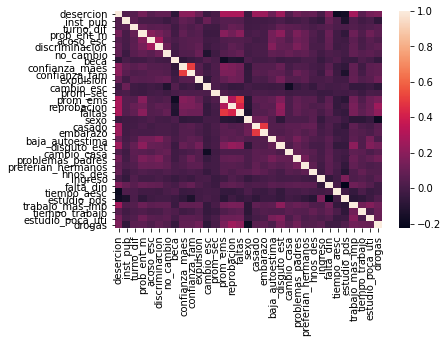

In [5]:
corr = ems.corr() 
sns.heatmap(corr, 
      xticklabels=corr.columns.values, 
      yticklabels=corr.columns.values) 

In [ ]:
#ems[["prom_ems", "faltas", "reprobacion"]].corr()

#ems[["confianza_maes", "confianza_fam"]].corr()


#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')

#plt.scatter(ems['prom_ems'], ems['reprobacion'],alpha=.1, marker = 'o')
#plt.grid()

#ems = ems[ (ems['desercion']== 1) ]
sns.regplot(y='desercion', x="prom_ems" , data=ems, logistic=True, n_boot=500, scatter=True, x_estimator=np.mean)



In [ ]:
#sns.pairplot(ems) 


In [ ]:
ems.corr()

In [ ]:
ems.info()
ems

# Estimacion

## Estimacion con todas las variables

In [ ]:
Y = ems['desercion']

X = list(ems)
X.remove('desercion')
X = ems[X]
X = sm.add_constant(X)


mdl = sm.Probit(Y, X)
 
mdl_fit = mdl.fit()
print(mdl_fit.summary())


In [ ]:
## Estimacion con variables seleccionadas

In [ ]:
Y = ems['desercion']

X = ["turno_dif", "no_cambio", "beca", "confianza_maes", "confianza_fam", "expulsion", "prom_ems", "reprobacion", "faltas", "casado", "embarazo", "baja_autoestima", "disguto_est", "problemas_padres", "hnos_des", "falta_din", "trabajo_mas_imp", "estudio_poca_uti", "drogas", "estudio_pds"]

X = ["turno_dif", "no_cambio", "beca", "confianza_maes", "confianza_fam", "expulsion", "prom_ems", "reprobacion", "faltas", "casado", "embarazo", "baja_autoestima", "disguto_est", "problemas_padres", "hnos_des", "falta_din", "trabajo_mas_imp", "estudio_poca_uti", "drogas"]
X = ems[X]
X = sm.add_constant(X)

In [ ]:
mdl = sm.Probit(Y, X)
 
mdl_fit = mdl.fit()

In [ ]:
# Imprimiendo Resultados:
print(mdl_fit.summary())

In [ ]:

# Efectos Marginnales:
mdl_margeff = mdl_fit.get_margeff()
print(mdl_margeff.summary())

In [ ]:
ems['estudio_pds'].unique()

In [ ]:
'''
X = ['desercion']+X
ems2 = ems[X]

ordered = ems2.desercion.value_counts().index
g = sns.FacetGrid(ems2, row="day", row_order=ordered,
                  height=1.7, aspect=4,)
g.map(sns.distplot, "total_bill", hist=False, rug=True)
'''

In [ ]:
'''
g = sns.PairGrid(tips, y_vars=["tip"], x_vars=["total_bill", "size"], height=4)
g.map(sns.regplot, color=".3")
g.set(ylim=(-1, 11), yticks=[0, 5, 10]);
'''